In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tweety

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import tweepy as tp

In [4]:
import tweepy
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAMEhlgEAAAAA7GvcIiKVrlXtdOfe04RVHwyym%2F4%3D6xrnyVZhj1gtbL7Epts3BuobHu8QNjI3ByGHwXDEma5ltqHzkl'
client = tweepy.Client(BEARER_TOKEN)

In [5]:
columns=['User','Tweet','Time']

In [6]:
data=[]

In [7]:
query = 'electric car'
tweet_fields = [
    'id',
    'text',
    'created_at',
]
tweets = client.search_recent_tweets(query=query, max_results=100,tweet_fields=tweet_fields)                        
for tweet in tweets.data:
    data.append([tweet.id,tweet.text,tweet.created_at])

In [8]:
df=pd.DataFrame(data,columns=columns)

In [9]:
df.to_csv('tweets.csv')

In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [13]:
!pip install scikit-learn

In [ ]:
#sentiment distribution visualisation

In [14]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
df.head()

,User,Tweet,Time
0,1655324598097829894,Best electric car bargain/Retro anatomy/42 bes...,2023-05-07 21:31:53+00:00
1,1655324401183739904,RT @BrianGitt: It’s time to stop pretending EV...,2023-05-07 21:31:06+00:00
2,1655323822587822083,@CMEvanGlass @TeslaMaryland @Royal_Farms An el...,2023-05-07 21:28:48+00:00
3,1655323708704141316,RT @BrianGitt: It’s time to stop pretending EV...,2023-05-07 21:28:21+00:00
4,1655323027574333442,RT @leclercswift13: the car is electric I'm su...,2023-05-07 21:25:38+00:00


In [17]:
 import pandas as pd
from textblob import TextBlob

# 读取csv文件
df = pd.read_csv('tweets.csv')

# 定义函数来计算情感分数
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

# 在数据框中添加新列
df['sentiment_score'] = df['Tweet'].apply(get_sentiment_score)

# 将结果保存到新的csv文件中
df.to_csv('tweets_with_sentiment.csv', index=False)


In [18]:
def get_sentiment_label(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score >= 0:
        return "Positive"
    else:
        return "Negative"

In [19]:
df['sentiment_label'] = df['Tweet'].apply(get_sentiment_label)

In [20]:
df.head()

,Unnamed: 0,User,Tweet,Time,sentiment_score,sentiment_label
0,0,1655324598097829894,Best electric car bargain/Retro anatomy/42 bes...,2023-05-07 21:31:53+00:00,1.00,Positive
1,1,1655324401183739904,RT @BrianGitt: It’s time to stop pretending EV...,2023-05-07 21:31:06+00:00,0.70,Positive
2,2,1655323822587822083,@CMEvanGlass @TeslaMaryland @Royal_Farms An el...,2023-05-07 21:28:48+00:00,0.12,Positive
3,3,1655323708704141316,RT @BrianGitt: It’s time to stop pretending EV...,2023-05-07 21:28:21+00:00,0.70,Positive
4,4,1655323027574333442,RT @leclercswift13: the car is electric I'm su...,2023-05-07 21:25:38+00:00,0.50,Positive


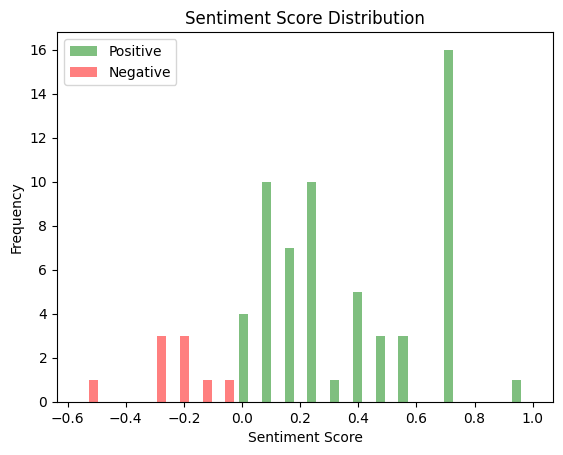

In [24]:
import matplotlib.pyplot as plt

# 将sentiment列的值分为Positive和Negative
positive = df[df['sentiment_score'] > 0]['sentiment_score']
negative = df[df['sentiment_score'] < 0]['sentiment_score']

# 计算频率
positive_freq = len(positive) / (len(positive) + len(negative))
negative_freq = len(negative) / (len(positive) + len(negative))

# 绘制直方图
plt.hist([positive, negative], color=['g','r'], alpha=0.5, bins=20, label=['Positive', 'Negative'])
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.title('Sentiment Score Distribution')
plt.show()


In [ ]:
#data cleaning

In [25]:
import nltk 
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [26]:
# Cleaning and removing the above stop words list from the tweet text
stop_words = stopwords.words('english')
# new_stopwords = ["all", "due", "to", "on", "daily"]
# stpwrd.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['Tweet'] = df['Tweet'].apply(lambda text: cleaning_stopwords(text))
df['Tweet'].head()

0    Best electric car bargain/Retro anatomy/42 bes...
1    RT @BrianGitt: It’s time stop pretending EVs g...
2    @CMEvanGlass @TeslaMaryland @Royal_Farms An el...
3    RT @BrianGitt: It’s time stop pretending EVs g...
4    RT @leclercswift13: car electric I'm sure max ...
Name: Tweet, dtype: object

In [28]:
import re

In [29]:
# Remove URLs
def remove_URLs(data):
    return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)
df['Tweet'] = df['Tweet'].apply(lambda x: remove_URLs(x))

In [30]:
# Remove punctuations
def remove_punctuations(data):
    return re.sub(r"[~.,%/:;?_&+*=!-]"," ",data)
df['Tweet']= df['Tweet'].apply(lambda x: remove_punctuations(x))

In [31]:
 # Remove numbers
def remove_numbers(data):
    return re.sub('[0-9]+', '', data)
df['Tweet'] = df['Tweet'].apply(lambda x: remove_numbers(x))

In [32]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['Tweet']= df['Tweet'].apply(lambda x: stemming_on_text(x))

In [33]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['Tweet'] = df['Tweet'].apply(lambda x: lemmatizer_on_text(x))

In [34]:
df.head()

,Unnamed: 0,User,Tweet,Time,sentiment_score,sentiment_label
0,0,1655324598097829894,Best electric car bargain Retro anatomy best ...,2023-05-07 21:31:53+00:00,1.00,Positive
1,1,1655324401183739904,RT @BrianGitt It’s time stop pretending EVs g...,2023-05-07 21:31:06+00:00,0.70,Positive
2,2,1655323822587822083,@CMEvanGlass @TeslaMaryland @Royal Farms An el...,2023-05-07 21:28:48+00:00,0.12,Positive
3,3,1655323708704141316,RT @BrianGitt It’s time stop pretending EVs g...,2023-05-07 21:28:21+00:00,0.70,Positive
4,4,1655323027574333442,RT @leclercswift car electric I'm sure max co...,2023-05-07 21:25:38+00:00,0.50,Positive


In [35]:
df.to_csv('clean_tweet.csv')

In [ ]:
#Positive words

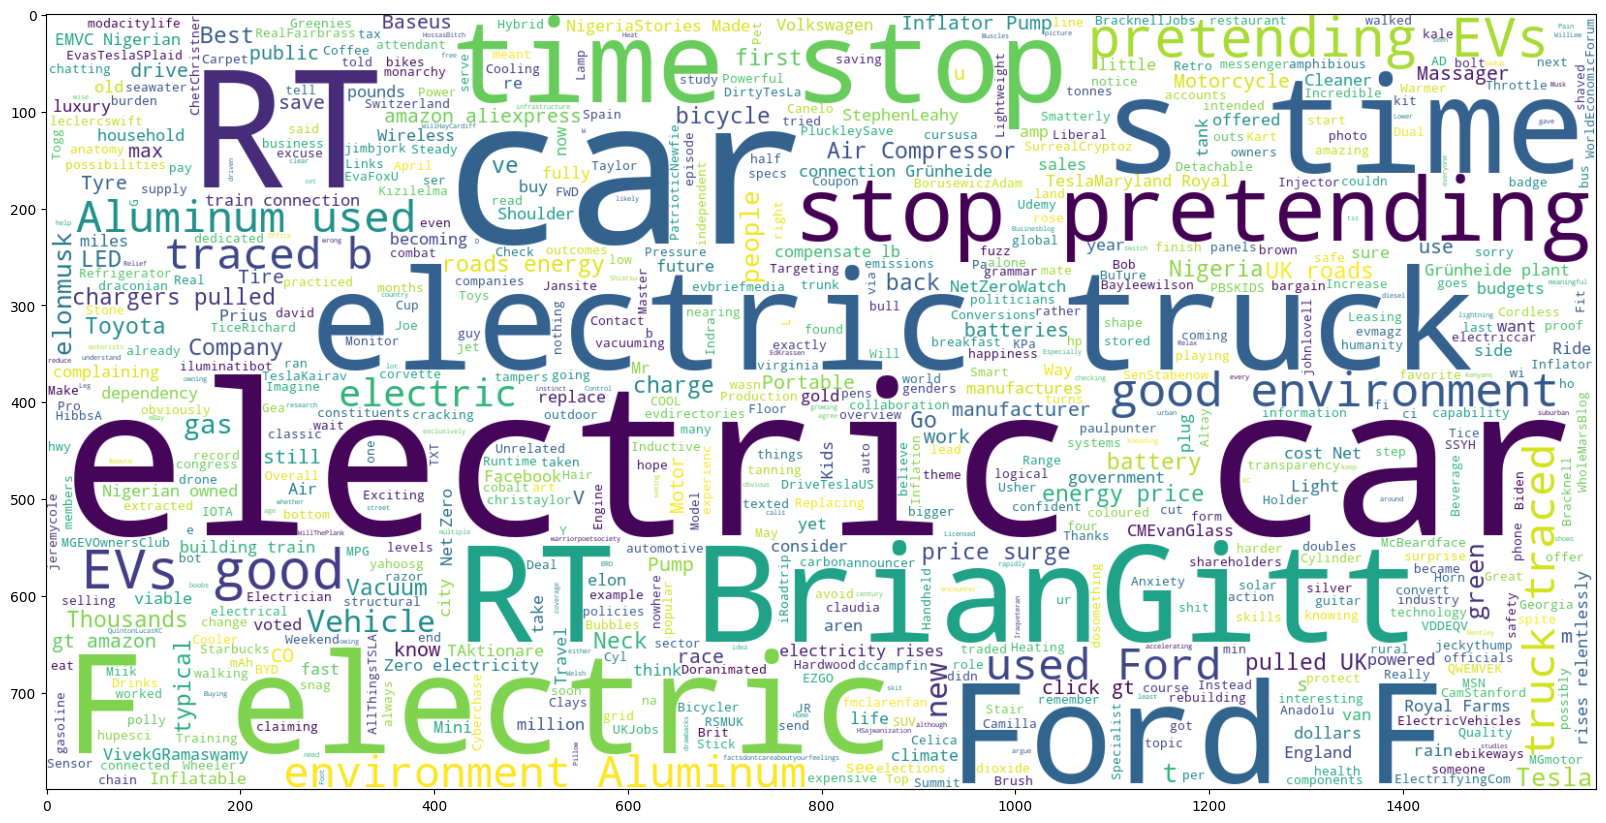

In [38]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment_label == 'Positive'].Tweet))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
#negative words

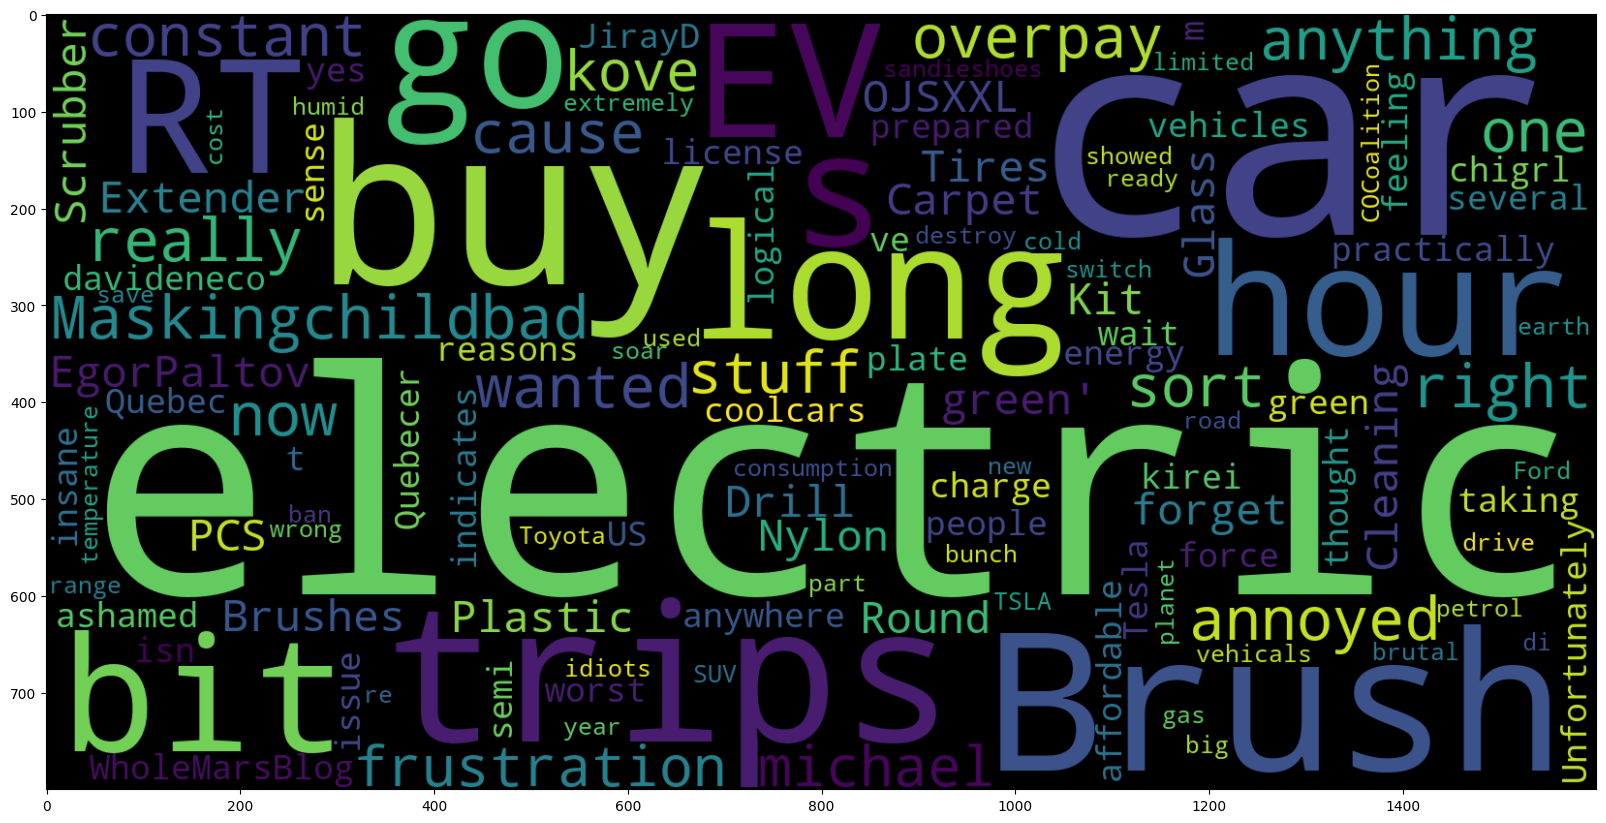

In [40]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment_label == 'Negative'].Tweet))
plt.imshow(wc , interpolation = 'bilinear')